I don't own the images used in my notes

# Key Words

`Distribution`: shows what values occur and how frequently those values occurred for a single variable.

`Discrete Distribution`: distributions that can only take on certain values (__*specific integers and/or floats*__).

A few examples are:
>- years
>- the number of children 
>- shoe sizes (10, 10.5, 11, 11.5, 12)

`Continuous Distribution`: distributions that can take on a nearly infinite number of values (__*any number*__). 

A few examples are:
>- sales
>- human height/weight

`Central Tendency`: Value considered a typical value, or "center" of data.

`Dispersion`: how spread out the data is.

# Discrete and Continuous Distributions

## From Raw to Probability
___
The examples below are from the sales prediction data set.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.style.use(['seaborn-v0_8-muted', 'fivethirtyeight'])
sns.set_context('talk')

sales_predictions ="https://docs.google.com/spreadsheets/d/e/2PACX-1vSsu3nnH_Ppm4Ao9XUqVlUZPfTx8bGv5gNbfSavqMhPhIWp4NwaEZk3W8FgDEhEJbg12sRU_FG5EBAb/pub?output=csv"
df = pd.read_csv(sales_predictions)

The y-axis on a `Histogram` typically shows the count of a particular value. But, we can change it to show probability instead of the count.

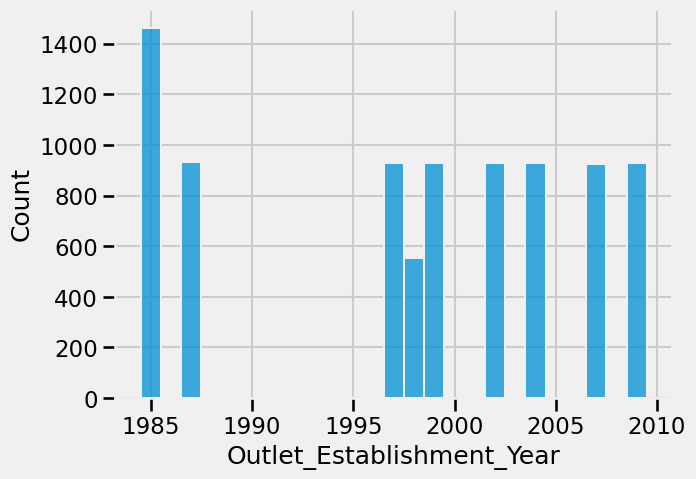

In [10]:
# Typical histograms aka frequency histogram
sns.histplot(data=df, x='Outlet_Establishment_Year', discrete=True);

`Probability Mass Function`
___
The histogram above plots the actual count of values that fall into each bin/bar.

- By dividing the `count (c)` by the `overall number of values (n)`, we can convert the raw counts per bin into the `probability (p)` that a value will fall into that bin (c / n = p).  

- A `probability` can easily be converted into a percentage by multiplying the probability by 100. A probability of 0.10 is the same as 10%.

You can achieve this by adding `stat = "density"` when you make the histogram.  This is a visual representation of the Probability Mass Function (PMF) for Outlet_Establishment_Year.

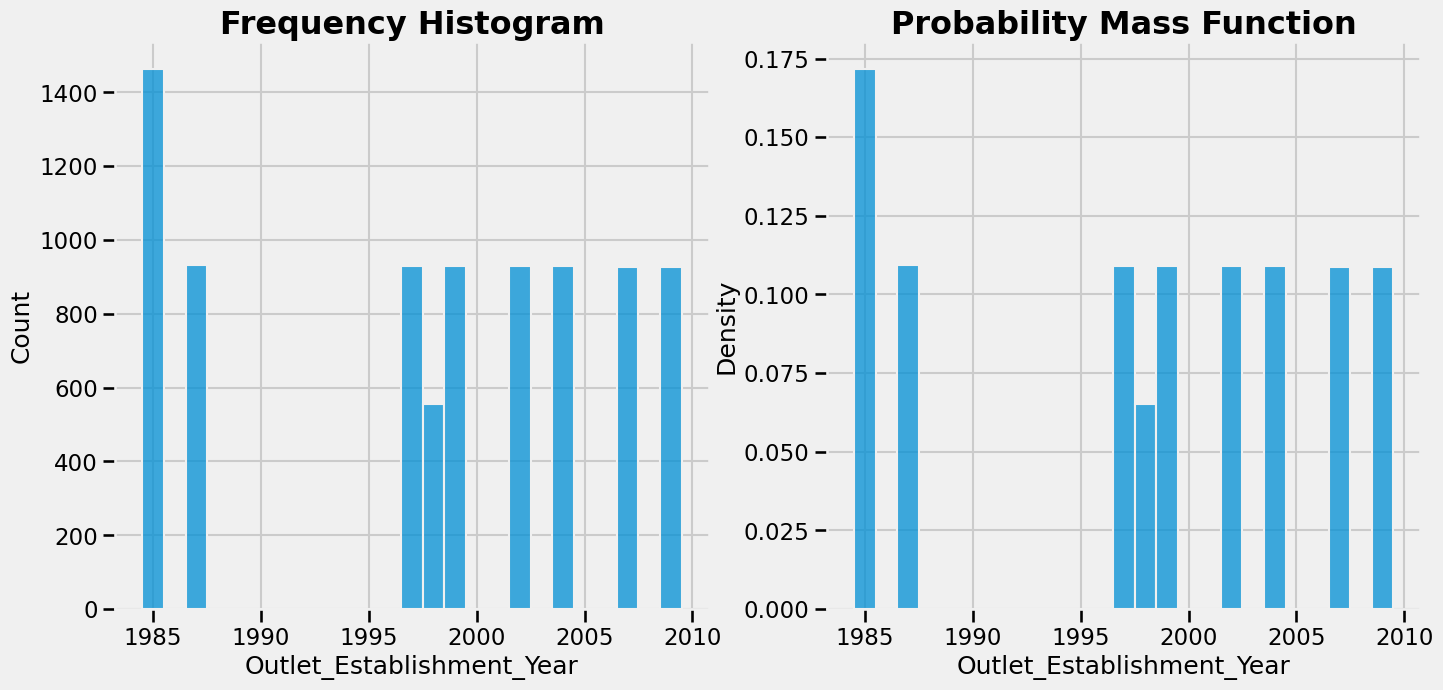

In [23]:
# Comparing the two types of Histograms

fig, axes = plt.subplots(ncols=2, figsize=(15, 7))

sns.histplot(data=df, x='Outlet_Establishment_Year', discrete=True, ax=axes[0])
axes[0].set_title('Frequency Histogram', fontweight='bold', fontsize=23)

sns.histplot(data=df, x='Outlet_Establishment_Year', discrete=True, stat='density', ax=axes[1])
axes[1].set_title('Probability Mass Function', fontweight='bold', fontsize=23);

__NOTE__: Despite the y-axis on the left being the raw count, while the y-axis on the right being the probability, the distribution is still exactly the same.

## From Discrete PMF to Continuous Kernel Density Estimates (KDE)

In order for us to get estimated probabilities for new values that were not in the original PMF, we can convert our PMF's bars into a continuous line by converting our `discrete probability mass` to a `continuous probability density`.

This `estimated probability curve` is called a `kernel-density estimate (KDE)`. Basically, a KDE is a way to interpolate between histogram bars so that we can get probability estimates for any value in and around our original distribution.

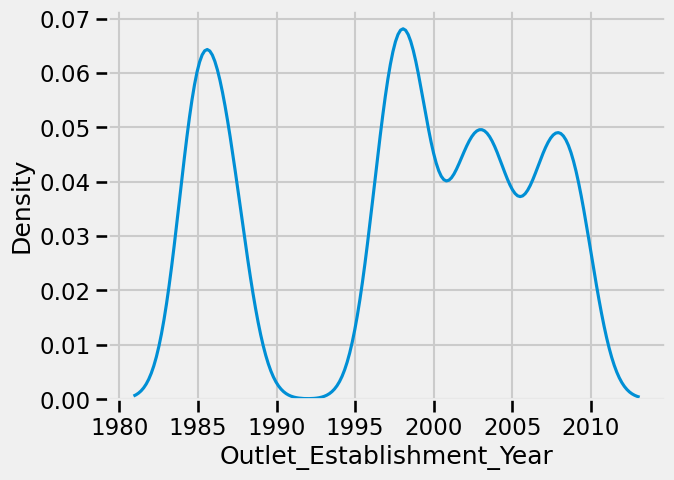

In [25]:
# The code to produce the KDE

sns.kdeplot(data=df, x='Outlet_Establishment_Year');

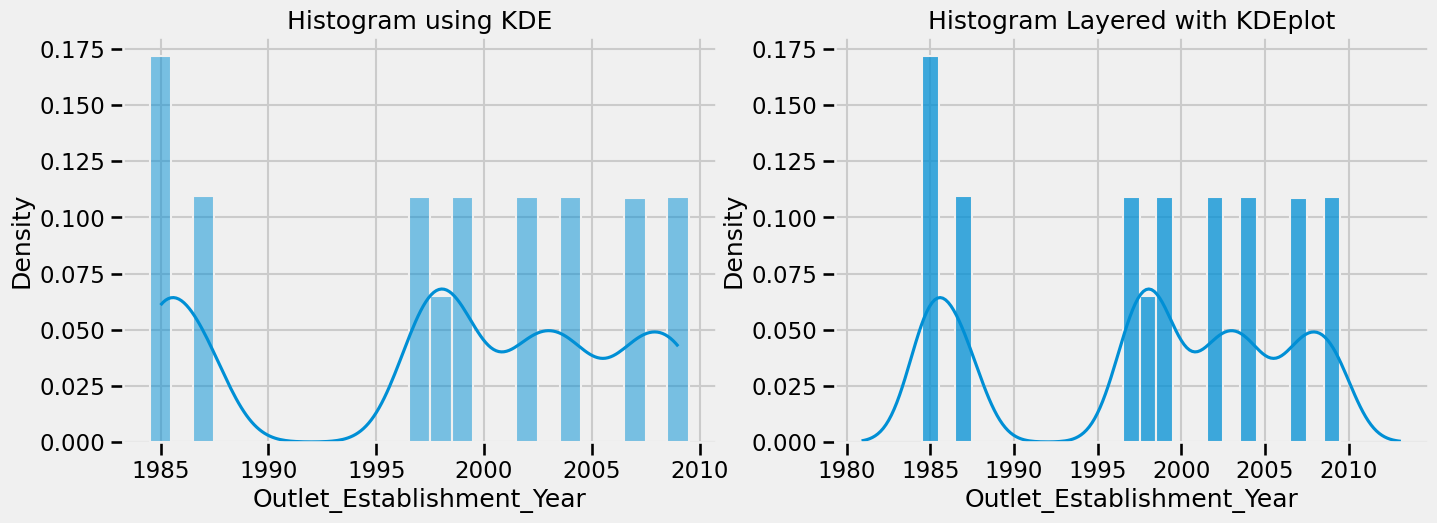

In [44]:
# Two ways to layer a histogram with a continuous KDE line

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))


# Do it directly in the parameters making the histplot
# (kde = True)
sns.histplot(data=df, x='Outlet_Establishment_Year', discrete=True, 
             stat='density', kde=True, ax=axes[0])
axes[0].set_title('Histogram using KDE')



# Layer a kdeplot on top of the histogram
sns.histplot(data=df, x='Outlet_Establishment_Year', discrete=True, 
             stat='density', ax=axes[1])
sns.kdeplot(data=df, x='Outlet_Establishment_Year', ax=axes[1])
axes[1].set_title('Histogram Layered with KDEplot');

__Probability of 0?__
___

Based on only the `discrete PMF`, it may seem that the probability of EVER finding an outlet that was established in 2008 is 0 since there are no previous values that fell into 2008. This is not the case as there is some chance; it is just very small.

To better determine probabilities for values not in the current data set, we use the `continuous probability density`. (blue line above). By inspecting the value of our curve at 2008, we can see there is an estimated probability of ~.05 (or a 5% chance) of finding a new outlet established in 2008!

Going forward, we will always want to think about our probabilities using continuous curves instead of discrete blocks.

# Measures of Central Tendency

A measure of `Central Tendency` is a single value that tries to describe the "center" of your data.

The "center" can be determined using `mean`, `median`, and `mode`.
>- `Mean`: Dividing the sum of all values by the number of values.
>- `Median`: The middle number in your data set, if you have an even number of values, it takes the mean of the two middle numbers to get the median.
>- `Mode`: The value that repeats the most often; the most frequent value in your data.

__How are they used?__
___
The `mean` is the most frequently used measure of central tendency and is generally considered the best measure. However, some situations might prefer median and/or mode.

The `median` is the preferred measure of central tendency when there are a few outliers in the distribution of the data, or there is a long tailed distribution. A `long tailed distribution` occurs when there are extreme values on one side.

The `mode` is the preferred measure when data are measured in a nominal (and even sometimes ordinal) scale. 

## Skew in Central Tendency
___
In a `normal distribution`, the mean, median, and mode all correspond to the same value.  This is considered symmetrical, and therefore there is no skew.

__What is skew?__

`Skew` is the measure of asymmetry in a dataset.

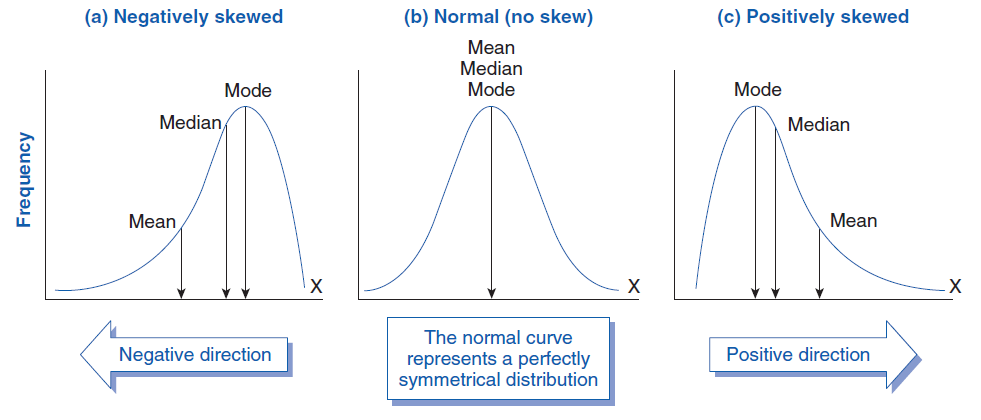

# Describing a Distribution

A `measure of dispersion` is a single value that attempts to describe how far apart the values are compared to the center of the data.

__Variance__
___
The goal is find a value to describe the distance between the center any data point.
We take the center value, subtract it by the all the points in the data, we raise the output to the 2nd power, summarize the values, then divide this value by the total number of values in our data.

This is `variance`
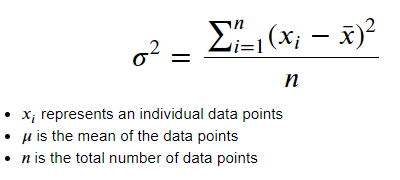

The major disadvantage to variance is that the measure of dispersion is now in different units than the central measure and other data points.

Variance is squared so we take the square root of the variance to get the `standard deviation`.

This is `standard deviation`
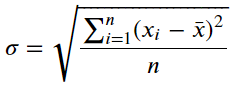

__Notice__: The variable for standard diviation is just sigma not sigma squared like variance.

Python can do the math for standard deviation us using `.std()`

In [1]:
# to calculate the standard deviation of a column in our dataset
# df['Column_name'].std()

Understanding Standard Deviation
___
When graphing standard deviation, a wider graph means there is a larger spread of the data. A thinner graph indicates a tighter spread.

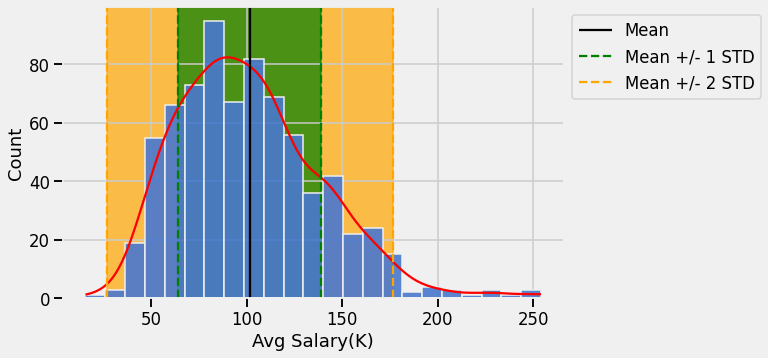

Using the above example, the green area represents `1 standard deviation` from the mean. The yellow represents `2 standard deviations` from the mean in both directions.

__Z-Scores__
___
`Z-scores` are another way of expressing how how much a value differs from the mean.  A z-score is measured in units of standard deviation.  A value that is 1 standard deviation away from the mean has a z-score of 1.

## Kurtosis

`Kurtosis` is a statistical measure used to describe the degree to which the distribution of values cluster in the tails or the peak of a frequency distribution. There are three types of kurtosis:

- Mesokurtic (values cluster in the middle of the distribution - normal)
- Leptokurtic ("pointy", values cluster in the peak of the distribution - positive)
- Platykurtic ("flat", values cluster in the tails of the distribution - negative).

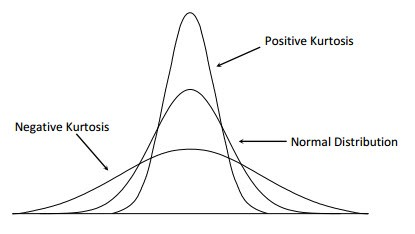

To calculate the kurtosis, you can use the following code. We set fisher = False to use the Pearson calculation. For more info look up kurtosis documentation.

In [2]:
# Example code to get the kurtosis
# from scipy import stats
# kurt = stats.kurtosis(df['column_name'], fisher = False)

Using the Pearson calculation, 

Mesokurtic (Kurtosis ~3)

Leptokurtic (Kurtosis >3)     

Platykurtic (Kurtosis < 3) 

# Annotating Distribution Plots

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Example data
url = 'https://docs.google.com/spreadsheets/d/1VMaw2oCn0ABitd-alLAEsEhGS1Je2UFNLu76TKrIH7w/gviz/tq?tqx=out:csv&sheet=Raw_Medical_Data_for_day1'
df = pd.read_csv(url, index_col = 0)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
1,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
2,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
3,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
4,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
5,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


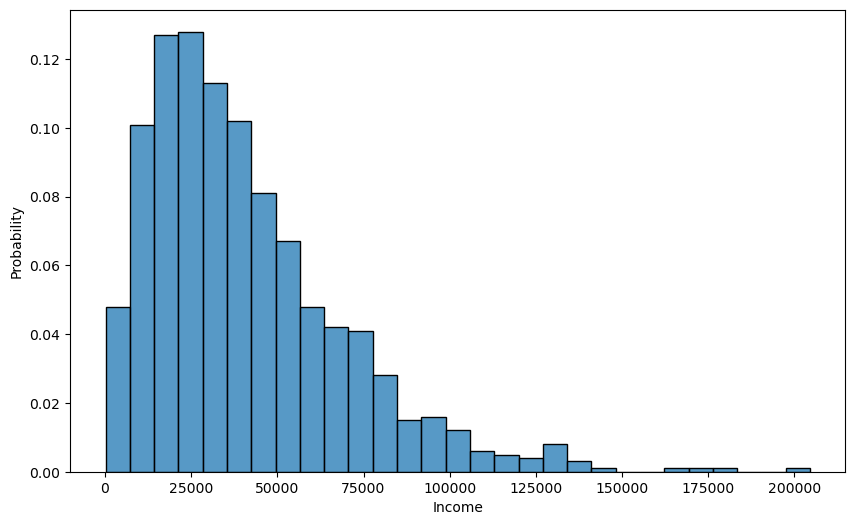

In [3]:
# Histogram of the Income
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['Income'], ax = ax, stat='probability');

Function Breakdown
___
`ax.axvline` is used to make a vertical or horizontal line set to a specific value. Here we set it to the mean, median and limits of standard deviation + 1 and standard deviation - 1.
> we use {variable:,.2f} so that the value is separated by commas appropiately and the value stops at 2 places after the decimal point

`ax.axvspan` is used to highlight an area on the graph, we use it to color in the area that 1 standard deviation covers.
> We use the parameter `zorder=0` so the highlight is behind the graph, otherwise it will cover over your graph.

In [42]:
# Function to make a histogram with mean and median
# Highlighting Standard Deviation
def histogram(col):
    feature = df[col]
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    std_plus1 = mean + std
    std_minus1 = mean - std
    
    fig,ax = plt.subplots(figsize=(10,6))

    
    sns.histplot(feature, ax=ax, stat='probability')
    ax.axvline(mean, color='red', label = f'Mean = {mean:,.2f}')
    ax.axvline(median, ls = '--', color='orange', label = f'Median = {median:,.2f}')
    ax.axvline(std_plus1, color='green', label = f'STD + 1 = {std_plus1:,.2f}')
    ax.axvline(std_minus1, color='green', label = f'STD - 1 = {std_minus1:,.2f}')
    ax.axvspan(std_plus1, std_minus1, color='grey', zorder=0)
    plt.title(f'{col}')
    plt.legend();

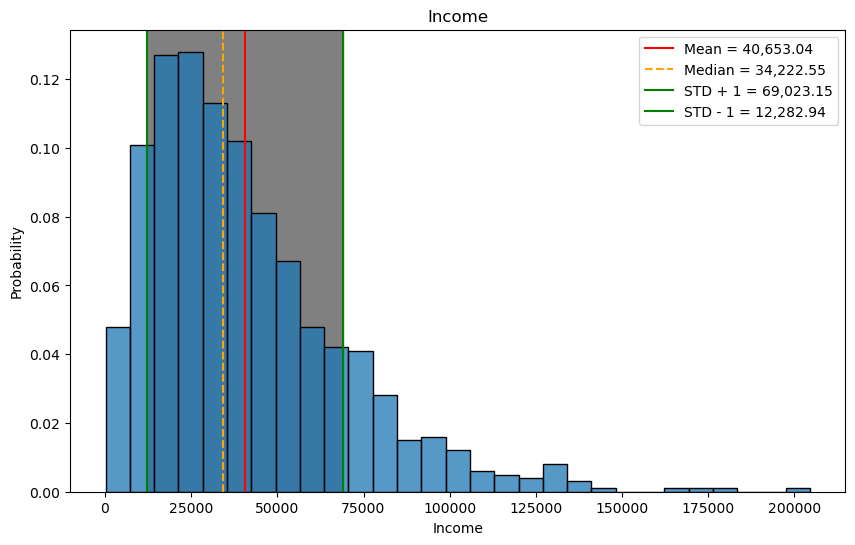

In [43]:
# Example 1

# Use function
histogram('Income')

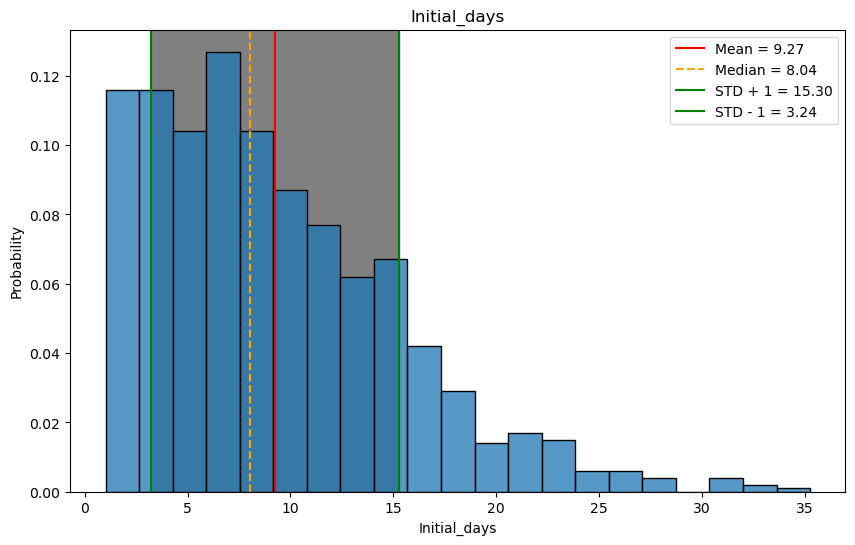

In [44]:
# Example 2

histogram('Initial_days')

# Standard Normal Distribution

What is normal distribution?
___
The normal distribution is a symmetrical probability distribution with the mean (average) at the center. It is without skew. Data closest to the average occurs more frequently/is more probable than data farthest from the average. In graph form, the normal distribution will appear as a bell-shaped curve. In a normal distribution, the mean, median, and mode are equal.

Normal distribution and Z-scores
___
Z scores are sometimes called "standard scores."

Z scores is equivalent to standard deviation, but in a normal distribution it helps split our data in even portions.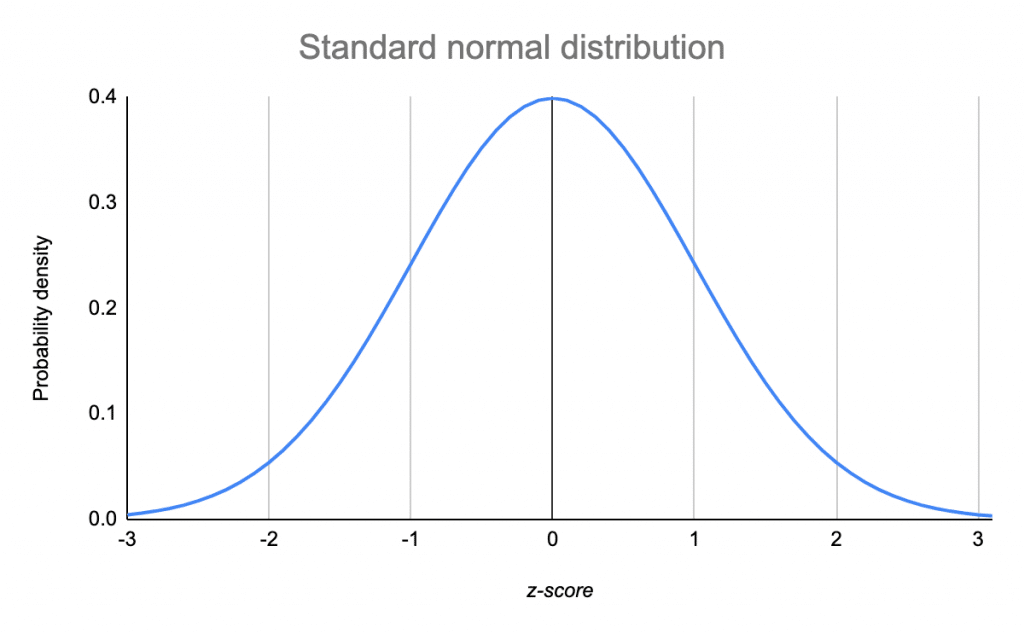 

For a normal distribution:

- 34.1% of the distribution will fall between the mean and 1 standard deviation above and below the mean.
- This means that 68.2% of the distribution falls within mean +/- 1 std (z-score between -1 and 1)
- We also know 13.6 % of the distribution falls between +1 std and +2 std and between -1 std and -2 std 
- This means that 95.4% of the distribution falls within 2 standard deviations (z score between -2 and 2)

An important fact to remember:
- Only 2.3% of the distribution falls above and only 2.3% of the distribution falls below 2 standard deviations.

This fact will become very important when we discuss sampling and p-values.
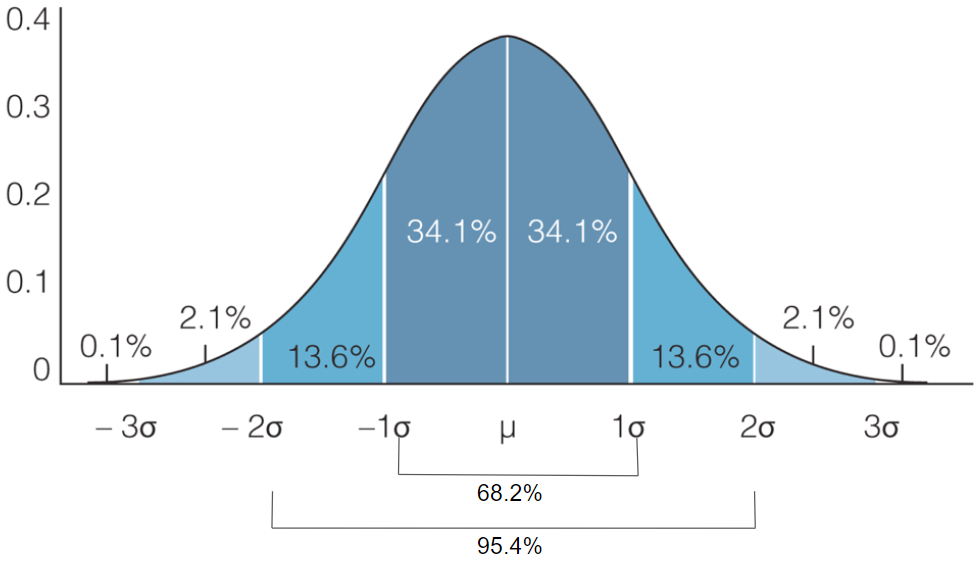

## Calculating Z score in python

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [46]:
# Using a human height data set
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [47]:
# Separate by Gender
male = df.loc[df['Gender'] == 'Male'].copy()
female = df.loc[df['Gender'] == 'Female'].copy()

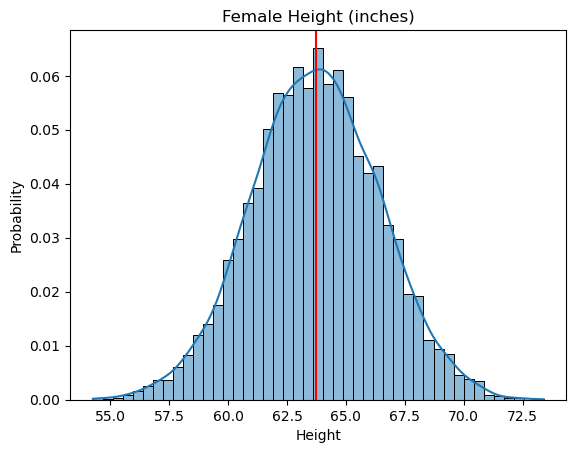

In [54]:
# Plot a hsitogram of probability using female
ax = sns.histplot(x=female['Height'], kde=True, stat='probability')
ax.axvline(female['Height'].mean(), color='red')
ax.set_title('Female Height (inches)');

There are many ways to convert the above graph to use z scores, here are three examples

In [55]:
# Manually calculate the z score
mean = female['Height'].mean()
std = female['Height'].std()

z_score_manually = (female['Height'] - mean) / std
z_score_manually

5000   -1.779502
5001    0.564198
5002   -0.126014
5003    0.286032
5004   -0.710488
          ...   
9995    0.913805
9996    1.245559
9997    0.059051
9998    1.975114
9999   -0.654429
Name: Height, Length: 5000, dtype: float64

In [57]:
# Use SciPy stats
z_scores_scipy = stats.zscore(female['Height'])
z_scores_scipy

5000   -1.779680
5001    0.564255
5002   -0.126027
5003    0.286061
5004   -0.710559
          ...   
9995    0.913897
9996    1.245684
9997    0.059057
9998    1.975312
9999   -0.654495
Name: Height, Length: 5000, dtype: float64

In [72]:
# Use scikitlearn Standard Scaler
scaler = StandardScaler()

z_scores_scaler = scaler.fit_transform(female[['Height']])
# Flatten array for graphing
z_scores_1dscaler = z_scores_scaler.ravel()

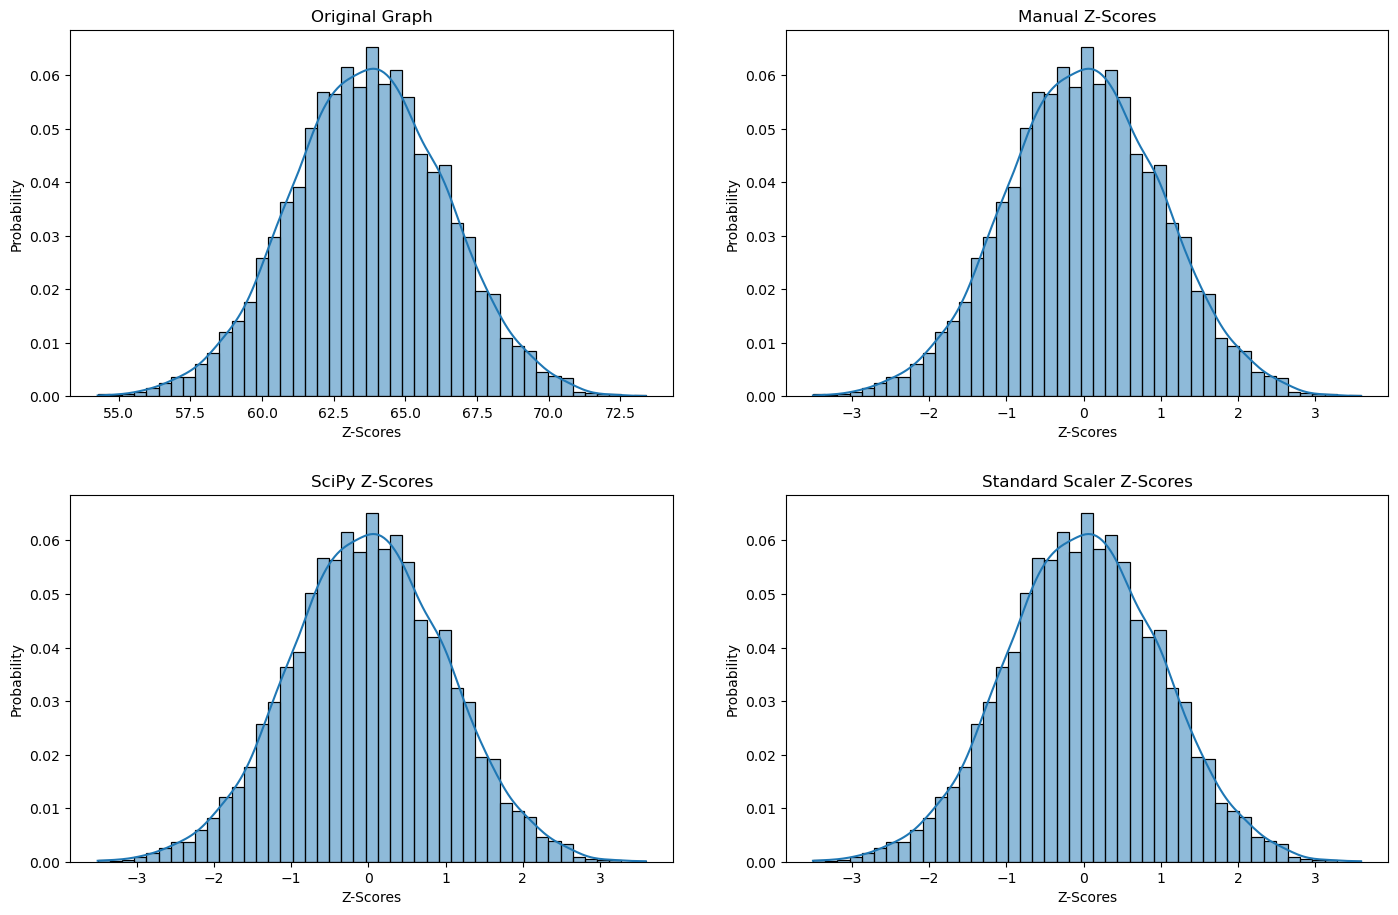

In [88]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
fig.tight_layout(pad=5)

axes = axes.ravel()

sns.histplot(x=female['Height'], stat='probability', kde=True, ax = axes[0])
axes[0].set_xlabel("Z-Scores")
axes[0].set_title("Original Graph")


sns.histplot(x=z_score_manually,stat='probability',kde=True, ax = axes[1])
axes[1].set_xlabel("Z-Scores")
axes[1].set_title("Manual Z-Scores")

sns.histplot(x=z_scores_scipy,stat='probability',kde=True, ax = axes[2])
axes[2].set_xlabel("Z-Scores")
axes[2].set_title("SciPy Z-Scores")

sns.histplot(x=z_scores_1dscaler,stat='probability',kde=True, ax = axes[3])
axes[3].set_xlabel("Z-Scores")
axes[3].set_title("Standard Scaler Z-Scores");

Regardless of how we do it, we get the same result and each looks identical to the original without z scores, it is just presented differently along the x axis

## Using the Normal Distribution PDF/CDF

Using the same data as above lets say our goal is to calculate the probability that a female has a height between 66.0 and 70.0 inches.

In [89]:
# Let's define our low and high end based on our goal range.
low_end = 66.0
high_end = 70.0

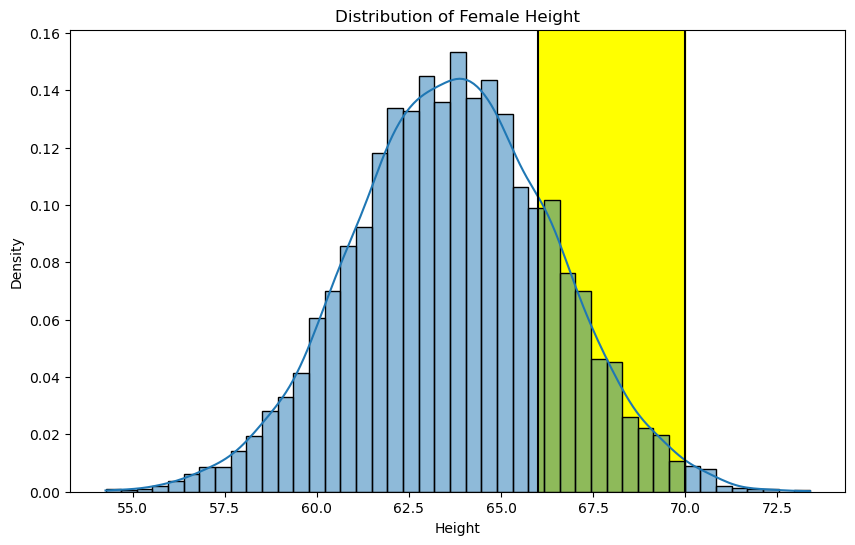

In [90]:
fig,ax = plt.subplots(figsize=(10,6))

sns.histplot(x=female['Height'], stat='density',kde=True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);

The graph above is our `probability distrivution plot` (PDF).

To find the area under the curve, we will use `cumulative probability distribution`.

__Cumulative Distribution Plots (CDF)__
___
To calculate the area under the curve between two values with python, we can leverage another form of our PDF called the cumulative distribution function (CDF).

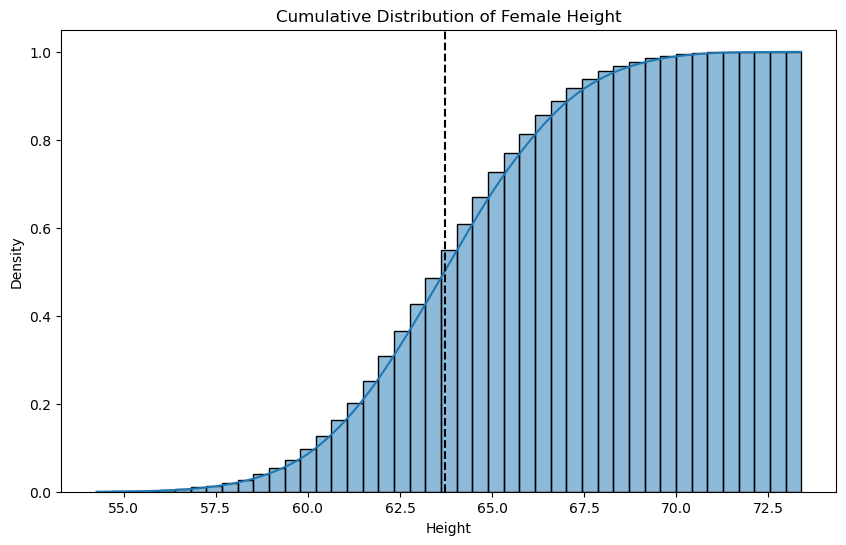

In [94]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=female['Height'], stat='density',kde=True,cumulative=True)
ax.set_title('Cumulative Distribution of Female Height')
ax.axvline(mean,color='k',ls='--');

- At the minimum height (54.26313333), the cumulative probability is nearly 0.
- As we increase x to add the next tallest people, the cumulative probability increases.
- By definition, we have 50% of the cumulative distribution when x= our mean of 63.71.
- As above average heights are included, the cumulative distribution continues to increase beyond 50%
- At the tallest height (73.38958587), the cumulative probability includes everyone and is 1 (100% of the people)
- Notice that the Cumulative Distribution will always sum up to one as we move from the left to right on our x-axis.  

## Normalizing PDF/CDF

While the height data is pretty close to being normal, before we can do our calculations, we will create the pdf and cdf for the normal curve that has the same mean and standard deviation as our data.

When using creating the pdf function/curve for any normal distribution, we will use stats.norm.pdf. It accepts the following parameters:

- x: range and spacing of x 
- loc: the mean (defaults to 0)
- scale: the standard deviation. (default =1 )

In [92]:
# let's defind some key stats
mean = np.mean(female['Height'])
std = np.std(female['Height'])
min = np.min(female['Height'])
max = np.max(female['Height'])

In [95]:
# Set the range and spacing for our normal curve
x_range = np.linspace(min, max, 1000)

In [100]:
# Normalize PDF
pdf = stats.norm.pdf(x_range, loc=mean, scale=std)

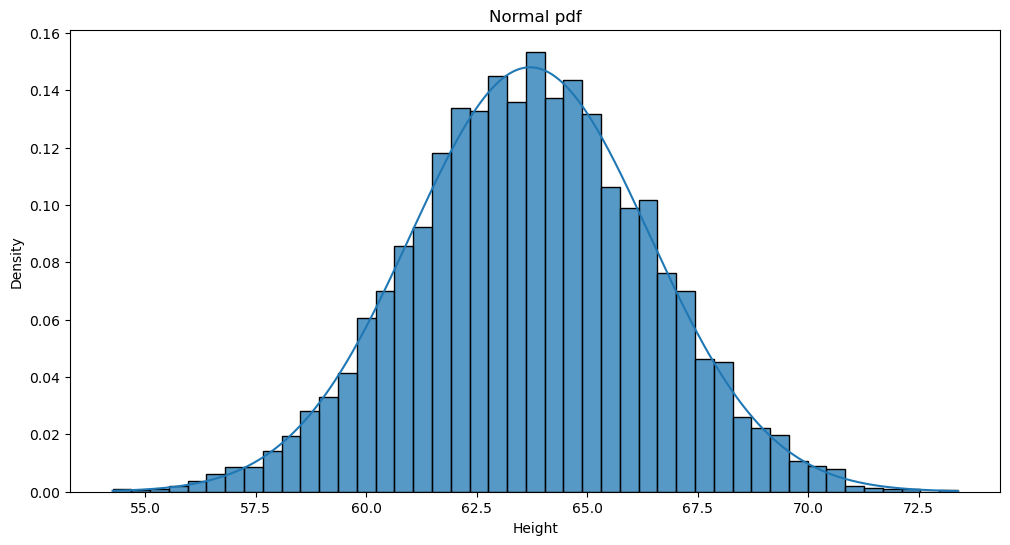

In [98]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=female['Height'], stat='density')
ax.plot(x_range,pdf)
ax.set_title('Normal pdf');

In [99]:
# Normalize CDF
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

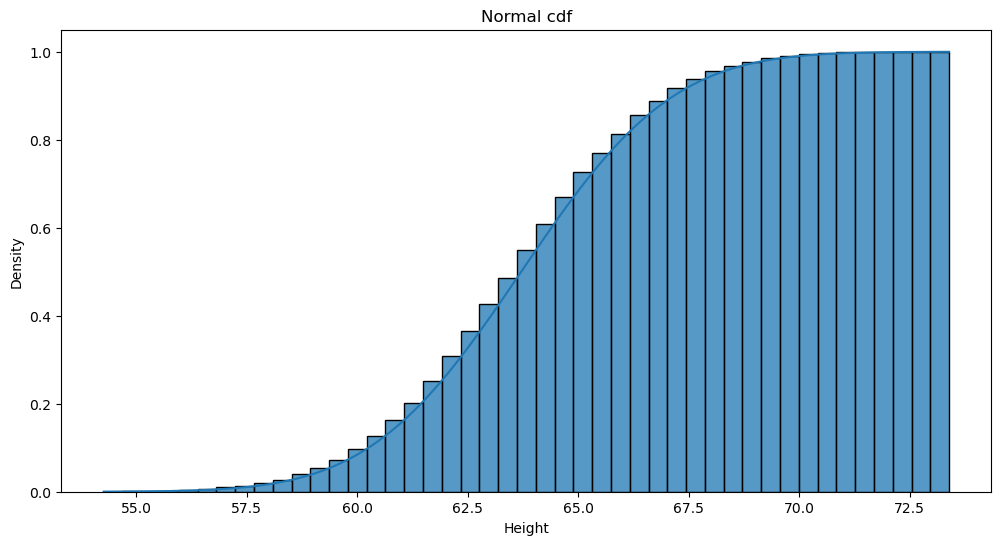

In [101]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=female['Height'], stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.set_title('Normal cdf');

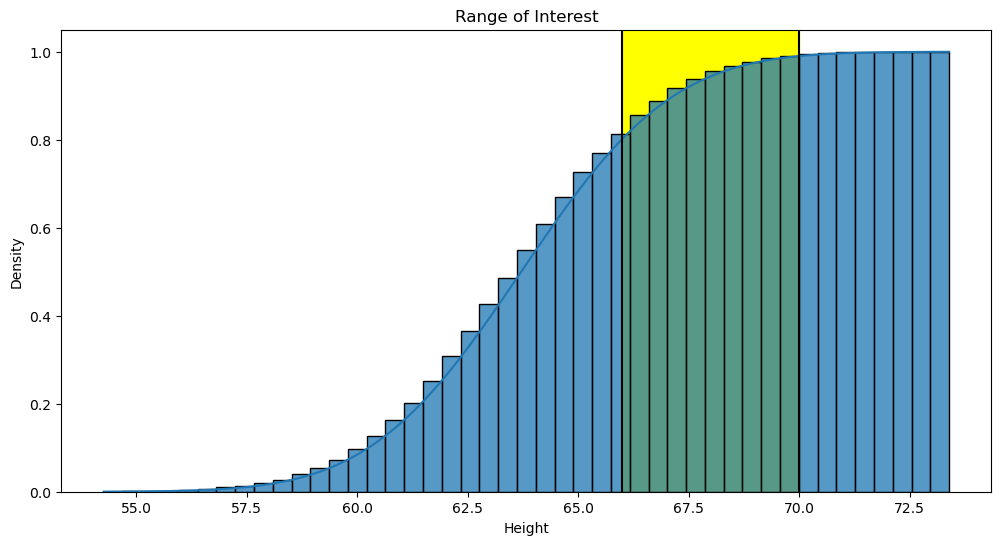

In [103]:
# Now let's plot considering the range of values we care about
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=female['Height'], stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

In [105]:
# Now that we explored the concept visually
# Let's run the numbers
## we subtract to find the probability of a value occurring in the range
stats.norm.cdf(high_end, loc=mean,scale=std) - stats.norm.cdf(low_end,loc=mean, scale=std)

0.1878921154347699

Based on the output the answer to our question is there is about an ~18% chance that any given female would have a height between 66.0 and 70. inches.

### Probability of less than or greater than

Instead of finding the probability of a specific range, we may instead want to know the probability of a value being less than or greater than a particular value.

In [107]:
# Probability of a female's height being less than 65 inches
stats.norm.cdf(65, loc=mean, scale=std)

0.6840089832900467

In [108]:
# Probability of a female's height being greater than 65 inches
1 - stats.norm.cdf(65, loc=mean, scale=std)

0.31599101670995333